In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_alterp_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Terpinene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42968,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74997,42973,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.00


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Alpha-Terpinene', 'index'], axis = 1)
y = df_knn[['X..Alpha-Terpinene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.75],
       [0.75],
       [0.75],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

<AxesSubplot:ylabel='Count'>

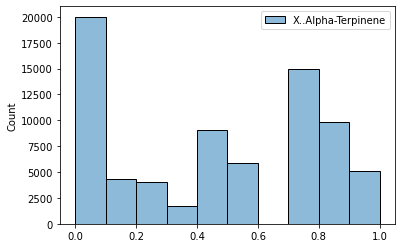

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.0636236752136752

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8984902613930947

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.8206571463506577

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([5.22921147e-04, 6.14705279e-04, 9.40575635e-03, 8.25932448e-04,
       1.71572137e-03, 1.16064144e-03, 1.15937807e-03, 2.38749508e-03,
       4.04202476e-04, 8.64492867e-04, 3.54234211e-04, 4.44829101e-03,
       3.59906381e-04, 5.75803586e-03, 9.60010505e-03, 8.12380813e-04,
       9.32051451e-04, 6.59787284e-04, 1.76689853e-04, 2.17347076e-03,
       1.55915262e-03, 1.28654978e-03, 8.46160180e-04, 1.02802321e-03,
       8.41510242e-04, 2.95248727e-04, 4.60193130e-04, 5.04181370e-04,
       4.12368220e-04, 2.81839758e-04, 2.42303650e-03, 4.90321519e-04,
       1.74600489e-03, 4.41844518e-04, 1.80072274e-03, 3.73251563e-03,
       5.16526498e-04, 2.92025969e-03, 2.05580782e-04, 1.19207085e-02,
       1.18301015e-03, 6.14536725e-04, 1.84711207e-04, 1.66613713e-03,
       2.99633749e-04, 8.44219123e-04, 1.47243796e-03, 7.75325450e-03,
       3.99548921e-03, 3.99643505e-04, 2.11998599e-04, 3.92139992e-04,
       7.28403089e-04, 7.16804725e-04, 7.75278782e-04, 6.29895994e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_2,tfidf_7,tfidf_11,tfidf_13,tfidf_14,tfidf_19,tfidf_30,tfidf_35,tfidf_37,tfidf_39,...,cheese,citrus,diesel,grape,lemon,mango,pungent,skunk,strawberry,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_2',
 'tfidf_7',
 'tfidf_11',
 'tfidf_13',
 'tfidf_14',
 'tfidf_19',
 'tfidf_30',
 'tfidf_35',
 'tfidf_37',
 'tfidf_39',
 'tfidf_47',
 'tfidf_48',
 'tfidf_62',
 'tfidf_69',
 'tfidf_73',
 'tfidf_78',
 'tfidf_82',
 'tfidf_91',
 'tfidf_93',
 'tfidf_101',
 'tfidf_103',
 'tfidf_104',
 'tfidf_119',
 'tfidf_121',
 'tfidf_125',
 'tfidf_127',
 'tfidf_137',
 'tfidf_141',
 'tfidf_145',
 'tfidf_146',
 'tfidf_149',
 'tfidf_151',
 'tfidf_155',
 'tfidf_158',
 'tfidf_161',
 'tfidf_167',
 'tfidf_168',
 'tfidf_199',
 'tfidf_207',
 'tfidf_208',
 'tfidf_210',
 'tfidf_213',
 'tfidf_215',
 'tfidf_222',
 'tfidf_230',
 'tfidf_233',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_272',
 'tfidf_276',
 'tfidf_280',
 'tfidf_281',
 'tfidf_285',
 'tfidf_289',
 'tfidf_297',
 'tfidf_301',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_319',
 'tfidf_329',
 'tfidf_333',
 'tfidf_337',
 'tfidf_345',
 'tfidf_351',
 'tfidf_357',
 'tfidf_360',
 'tfidf_362',
 'tfidf_366',
 'tfidf_371',
 'tfidf_376',

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_alterp.pkl")
joblib.dump(selector, "selector_knn_tfidf_alterp.pkl")

['selector_knn_tfidf_alterp.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.06418730540293036

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.02201409901679071

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.14837148990554322

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8885269036457828

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8202578559583044

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03436197698211732

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.014034294313253814

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11846642694558579

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9851099823632548

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8854118831730338

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_alterp.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_alterp.pkl")

['y_test_knreg_tfidf_alterp.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03522945242663776

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8732474338791092

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.015158334608402331

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12311918862794025

In [47]:
y_test

,X..Alpha-Terpinene
11591,0.750000
52020,0.750000
34666,0.875000
22169,1.000000
23049,1.000000
...,...
60863,0.500000
32316,0.875000
60933,0.500000
43206,0.416667


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

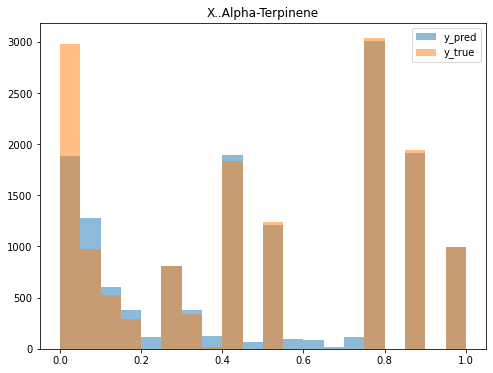

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Terpinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_alterp.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.937
P-value: 0.000


<AxesSubplot:>

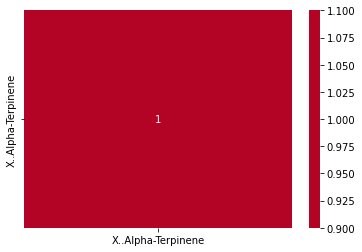

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)